In [1]:
#importing libraries

import pandas as pd
import numpy as np

import json
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set(style="whitegrid")

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         393 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0

The following packages will be UPDATED:

  ca-certificates                     2020.4.5

In [2]:
#create dataframe from Kaggle dataset
coviddf= pd.read_csv('Case.csv')
coviddf

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,133.0,37.538621,126.992652
1,1000002,Seoul,Guro-gu,True,Guro-gu Call Center,99.0,37.508163,126.884387
2,1000003,Seoul,Dongdaemun-gu,True,Dongan Church,20.0,37.592888,127.056766
3,1000004,Seoul,Guro-gu,True,Manmin Central Church,41.0,37.481059,126.894343
4,1000005,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14.0,37.63369,126.9165
...,...,...,...,...,...,...,...,...
123,6100010,Gyeongsangnam-do,-,False,etc,19.0,-,-
124,7000001,Jeju-do,-,False,overseas inflow,10.0,-,-
125,7000002,Jeju-do,-,False,contact with patient,0.0,-,-
126,7000003,Jeju-do,-,False,etc,4.0,-,-


### Data Wrangling

In [3]:
# check for NaN value
coviddf.isnull().sum().sum()

3

In [4]:
# drop the rows contains NaN value
coviddf = coviddf.dropna()
# drop the rows that do not have latitude & logitude value
drop = coviddf[coviddf['latitude'] == '-'].index
coviddf.drop(drop, inplace = True)
print(coviddf.shape)
coviddf

(45, 8)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,133.0,37.538621,126.992652
1,1000002,Seoul,Guro-gu,True,Guro-gu Call Center,99.0,37.508163,126.884387
2,1000003,Seoul,Dongdaemun-gu,True,Dongan Church,20.0,37.592888,127.056766
3,1000004,Seoul,Guro-gu,True,Manmin Central Church,41.0,37.481059,126.894343
4,1000005,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14.0,37.63369,126.9165
5,1000006,Seoul,Seongdong-gu,True,Seongdong-gu APT,13.0,37.55713,127.0403
6,1000007,Seoul,Jongno-gu,True,Jongno Community Center,10.0,37.57681,127.006
7,1000008,Seoul,Gangnam-gu,True,Samsung Medical Center,7.0,37.48825,127.08559
8,1000009,Seoul,Jung-gu,True,Jung-gu Fashion Company,7.0,37.562405,126.984377
9,1000010,Seoul,Seodaemun-gu,True,Yeonana News Class,4.0,37.558147,126.943799


In [5]:
# drop the unnecessary columns
coviddf.drop(['case_id', 'group'], axis = 1, inplace = True)
coviddf.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,province,city,infection_case,confirmed,latitude,longitude
0,Seoul,Yongsan-gu,Itaewon Clubs,133.0,37.538621,126.992652
1,Seoul,Guro-gu,Guro-gu Call Center,99.0,37.508163,126.884387
2,Seoul,Dongdaemun-gu,Dongan Church,20.0,37.592888,127.056766
3,Seoul,Guro-gu,Manmin Central Church,41.0,37.481059,126.894343
4,Seoul,Eunpyeong-gu,Eunpyeong St. Mary's Hospital,14.0,37.63369,126.9165


In [6]:
# sort by the highest confirmed case
coviddf.sort_values(by = ['confirmed'], inplace = True, ascending = False)
coviddf.reset_index(drop = True, inplace = True)
coviddf.confirmed = coviddf.confirmed.astype('int64')
coviddf.latitude = coviddf.latitude.astype('float')
coviddf.longitude = coviddf.longitude.astype('float')
coviddf

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,province,city,infection_case,confirmed,latitude,longitude
0,Daegu,Nam-gu,Shincheonji Church,4510,35.840080,128.566700
1,Daegu,Dalseong-gun,Second Mi-Ju Hospital,196,35.857375,128.466651
2,Seoul,Yongsan-gu,Itaewon Clubs,133,37.538621,126.992652
3,Daegu,Seo-gu,Hansarang Convalescent Hospital,128,35.885592,128.556649
4,Gyeongsangbuk-do,Cheongdo-gun,Cheongdo Daenam Hospital,120,35.648870,128.736800
5,Chungcheongnam-do,Cheonan-si,gym facility in Cheonan,103,36.815030,127.113900
6,Daegu,Dalseong-gun,Daesil Convalescent Hospital,100,35.857393,128.466653
7,Seoul,Guro-gu,Guro-gu Call Center,99,37.508163,126.884387
8,Gyeonggi-do,Seongnam-si,River of Grace Community Church,72,37.455687,127.161627
9,Gyeongsangbuk-do,Bonghwa-gun,Bonghwa Pureun Nursing Home,68,36.927570,128.909900


In [7]:
# province that have highest positive case
province = coviddf.groupby('province')[['confirmed']].sum()
province.sort_values(by = ['confirmed'], inplace = True, ascending = False)
province.reset_index(drop = False, inplace = True)
province

,province,confirmed
0,Daegu,4971
1,Gyeongsangbuk-do,363
2,Seoul,352
3,Gyeonggi-do,202
4,Chungcheongnam-do,112
5,Busan,54
6,Gyeongsangnam-do,42
7,Sejong,38
8,Chungcheongbuk-do,11
9,Daejeon,3


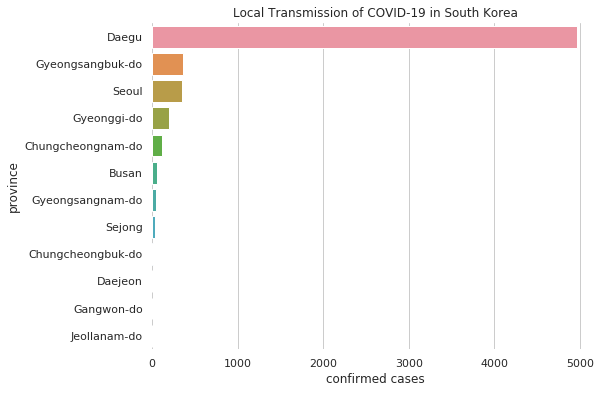

In [8]:
# visualize the province using barplot
width = 8
height = 6
plt.figure(figsize=(width, height))
sns.barplot(x = "confirmed", y = "province", data = province)
sns.despine(left=True, bottom=True)

plt.title("Local Transmission of COVID-19 in South Korea")
plt.xlabel("confirmed cases")
plt.show()

In [9]:
#classified the confirmed cases by venue
total = coviddf['confirmed'].sum()
church = np.where(coviddf['infection_case'].str.contains('Church'),coviddf['confirmed'],0).sum()
hospital = np.where(coviddf['infection_case'].str.contains('Hospital'),coviddf['confirmed'],0).sum()
others = total - church - hospital
local = pd.DataFrame({'spread_group': ['Church', 'Hospital', 'Others'], 'confirmed_cases': [church, hospital, others], 
                      'percentage': [church/total*100, hospital/total*100, others/total*100]})
local['percentage'] = local['percentage'].round(decimals = 2)
local

,spread_group,confirmed_cases,percentage
0,Church,4710,76.55
1,Hospital,674,10.95
2,Others,769,12.50


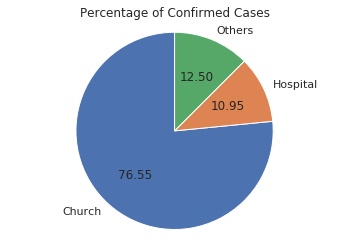

In [10]:
#visualization using pie chart
pieLabels = local['spread_group']
percentage = local['percentage']
figureObject, axesObject = plt.subplots()
axesObject.pie(percentage,
        labels=pieLabels,
        autopct='%1.2f',
        startangle=90)
axesObject.axis('equal')
plt.title('Percentage of Confirmed Cases')
plt.show()

In [11]:
#focus only on cases from Daegu as the province with highest cases
daegudf = coviddf[coviddf['province']=="Daegu"].reset_index(drop = True)
daegudf

,province,city,infection_case,confirmed,latitude,longitude
0,Daegu,Nam-gu,Shincheonji Church,4510,35.840080,128.566700
1,Daegu,Dalseong-gun,Second Mi-Ju Hospital,196,35.857375,128.466651
2,Daegu,Seo-gu,Hansarang Convalescent Hospital,128,35.885592,128.556649
3,Daegu,Dalseong-gun,Daesil Convalescent Hospital,100,35.857393,128.466653
4,Daegu,Dong-gu,Fatima Hospital,37,35.883950,128.624059


In [12]:
#create a Daegu map
address = 'Daegu, South Korea'

geolocator = Nominatim(user_agent="kor_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

map_korea = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, label in zip(daegudf['latitude'], daegudf['longitude'], daegudf['infection_case']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_korea)  
    
map_korea

In [13]:
#credential for Foursquare API
CLIENT_ID = '4T3SE2UVP4WEWOXAT5T3D20055CIQ44Z5OEHTCFZBZJH4PTZ'
CLIENT_SECRET = 'UPOUFOOEYUFQIQG2PJSP2ZSQNCI4OSHOYCYVXCPJUBHNX3PG'
VERSION = '20180605'
QUERY = 'Hospital'

In [14]:
#create a function to get nearby hospital from infected venue
LIMIT = 100
radius = 30000

def getNearbyHospital(names, latitudes, longitudes, radius=30000):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            QUERY,
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['venues']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],  
            v['categories'][0]['name']) for v in results])

    nearby_hospital = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_hospital.columns = ['infection_case', 
                  'Latitude', 
                  'Longitude', 
                  'Hospital', 
                  'Hospital Latitude', 
                  'Hospital Longitude', 
                  'Hospital Category']
    
    return(nearby_hospital)

In [15]:
#call the neearby hospital
daegu_hospital = getNearbyHospital(names=daegudf['infection_case'],
                                   latitudes=daegudf['latitude'],
                                   longitudes=daegudf['longitude']
                                  )

print(daegu_hospital.shape)
daegu_hospital

Shincheonji Church
Second Mi-Ju Hospital
Hansarang Convalescent Hospital
Daesil Convalescent Hospital
Fatima Hospital
(138, 7)


,infection_case,Latitude,Longitude,Hospital,Hospital Latitude,Hospital Longitude,Hospital Category
0,Shincheonji Church,35.84008,128.566700,대구가톨릭대학교병원 (Catholic University of Daegu Hospi...,35.843541,128.568839,Hospital
1,Shincheonji Church,35.84008,128.566700,Hyosung Hospital (효성병원),35.842730,128.612706,Hospital
2,Shincheonji Church,35.84008,128.566700,내이치과병원 NEI Dental Hospital,35.860947,128.598931,Dentist's Office
3,Shincheonji Church,35.84008,128.566700,맥치과병원 (Mac Dental Hospital),35.859134,128.628417,Dentist's Office
4,Shincheonji Church,35.84008,128.566700,Mac Dental Hospital,35.841541,128.545447,Dentist's Office
...,...,...,...,...,...,...,...
133,Fatima Hospital,35.88395,128.624059,Kabul Hospital (갑을구미병원),36.107246,128.402776,Hospital
134,Fatima Hospital,35.88395,128.624059,Soon Chun Hyang University Hospital Gumi (순천향대...,36.102840,128.382613,Hospital
135,Fatima Hospital,35.88395,128.624059,Gumi Cha Hospital (구미차병원),36.114023,128.340177,Hospital
136,Fatima Hospital,35.88395,128.624059,Hyeonggok Children's Hospital (형곡아동의원),36.113870,128.338730,Hospital


In [16]:
#filter only data with "Hospital" category
daeguhospital = daegu_hospital[daegu_hospital['Hospital Category']=="Hospital"].reset_index(drop = True)
daeguhospital

,infection_case,Latitude,Longitude,Hospital,Hospital Latitude,Hospital Longitude,Hospital Category
0,Shincheonji Church,35.84008,128.566700,대구가톨릭대학교병원 (Catholic University of Daegu Hospi...,35.843541,128.568839,Hospital
1,Shincheonji Church,35.84008,128.566700,Hyosung Hospital (효성병원),35.842730,128.612706,Hospital
2,Shincheonji Church,35.84008,128.566700,미래여성병원,35.850686,128.537456,Hospital
3,Shincheonji Church,35.84008,128.566700,Sodaegu Hospital,35.869783,128.553078,Hospital
4,Shincheonji Church,35.84008,128.566700,Kyungpook National Univ Dental Hospital,35.864213,128.601601,Hospital
...,...,...,...,...,...,...,...
93,Fatima Hospital,35.88395,128.624059,Kabul Hospital (갑을구미병원),36.107246,128.402776,Hospital
94,Fatima Hospital,35.88395,128.624059,Soon Chun Hyang University Hospital Gumi (순천향대...,36.102840,128.382613,Hospital
95,Fatima Hospital,35.88395,128.624059,Gumi Cha Hospital (구미차병원),36.114023,128.340177,Hospital
96,Fatima Hospital,35.88395,128.624059,Hyeonggok Children's Hospital (형곡아동의원),36.113870,128.338730,Hospital


In [17]:
#remove duplicate values
daeguhospital = daeguhospital.drop_duplicates(subset = ['Hospital']).reset_index(drop = True)
daeguhospital

,infection_case,Latitude,Longitude,Hospital,Hospital Latitude,Hospital Longitude,Hospital Category
0,Shincheonji Church,35.84008,128.5667,대구가톨릭대학교병원 (Catholic University of Daegu Hospi...,35.843541,128.568839,Hospital
1,Shincheonji Church,35.84008,128.5667,Hyosung Hospital (효성병원),35.842730,128.612706,Hospital
2,Shincheonji Church,35.84008,128.5667,미래여성병원,35.850686,128.537456,Hospital
3,Shincheonji Church,35.84008,128.5667,Sodaegu Hospital,35.869783,128.553078,Hospital
4,Shincheonji Church,35.84008,128.5667,Kyungpook National Univ Dental Hospital,35.864213,128.601601,Hospital
5,Shincheonji Church,35.84008,128.5667,Kyungpook National University Hospital (경북대학교병원),35.866562,128.604793,Hospital
6,Shincheonji Church,35.84008,128.5667,굳센병원,35.867560,128.621608,Hospital
7,Shincheonji Church,35.84008,128.5667,Keimyung University Dongsan Medical Center (계명...,35.868964,128.582900,Hospital
8,Shincheonji Church,35.84008,128.5667,Daegu Fatima Hospital (대구 파티마 병원),35.883748,128.623681,Hospital
9,Shincheonji Church,35.84008,128.5667,Union Hospital (유니온병원),35.872249,128.603750,Hospital


In [18]:
#drop unnecessary columns and irrelevant data
daeguhospital = daeguhospital.drop(['Hospital Category'], axis = 1)
daeguhospital = daeguhospital.drop(daeguhospital.index[3]).reset_index(drop = True)
daeguhospital = daeguhospital.reset_index(drop = True)
daeguhospital

,infection_case,Latitude,Longitude,Hospital,Hospital Latitude,Hospital Longitude
0,Shincheonji Church,35.84008,128.5667,대구가톨릭대학교병원 (Catholic University of Daegu Hospi...,35.843541,128.568839
1,Shincheonji Church,35.84008,128.5667,Hyosung Hospital (효성병원),35.842730,128.612706
2,Shincheonji Church,35.84008,128.5667,미래여성병원,35.850686,128.537456
3,Shincheonji Church,35.84008,128.5667,Kyungpook National Univ Dental Hospital,35.864213,128.601601
4,Shincheonji Church,35.84008,128.5667,Kyungpook National University Hospital (경북대학교병원),35.866562,128.604793
5,Shincheonji Church,35.84008,128.5667,굳센병원,35.867560,128.621608
6,Shincheonji Church,35.84008,128.5667,Keimyung University Dongsan Medical Center (계명...,35.868964,128.582900
7,Shincheonji Church,35.84008,128.5667,Daegu Fatima Hospital (대구 파티마 병원),35.883748,128.623681
8,Shincheonji Church,35.84008,128.5667,Union Hospital (유니온병원),35.872249,128.603750
9,Shincheonji Church,35.84008,128.5667,Rosemary Women & Children's Hospital (로즈마리병원),35.943261,128.557775


In [19]:
#translate the hospital name which consist Hangul letter only
daeguhospital = daeguhospital.replace(to_replace = "미래여성병원", value = "Future Women Hospital")
daeguhospital = daeguhospital.replace(to_replace = "굳센병원", value = "Goodyear Hospital")
daeguhospital

,infection_case,Latitude,Longitude,Hospital,Hospital Latitude,Hospital Longitude
0,Shincheonji Church,35.84008,128.5667,대구가톨릭대학교병원 (Catholic University of Daegu Hospi...,35.843541,128.568839
1,Shincheonji Church,35.84008,128.5667,Hyosung Hospital (효성병원),35.842730,128.612706
2,Shincheonji Church,35.84008,128.5667,Future Women Hospital,35.850686,128.537456
3,Shincheonji Church,35.84008,128.5667,Kyungpook National Univ Dental Hospital,35.864213,128.601601
4,Shincheonji Church,35.84008,128.5667,Kyungpook National University Hospital (경북대학교병원),35.866562,128.604793
5,Shincheonji Church,35.84008,128.5667,Goodyear Hospital,35.867560,128.621608
6,Shincheonji Church,35.84008,128.5667,Keimyung University Dongsan Medical Center (계명...,35.868964,128.582900
7,Shincheonji Church,35.84008,128.5667,Daegu Fatima Hospital (대구 파티마 병원),35.883748,128.623681
8,Shincheonji Church,35.84008,128.5667,Union Hospital (유니온병원),35.872249,128.603750
9,Shincheonji Church,35.84008,128.5667,Rosemary Women & Children's Hospital (로즈마리병원),35.943261,128.557775


In [20]:
#drop unnecessary columns
daeguhospital = daeguhospital.drop(['infection_case', 'Latitude', 'Longitude'], axis = 1)
daeguhospital

,Hospital,Hospital Latitude,Hospital Longitude
0,대구가톨릭대학교병원 (Catholic University of Daegu Hospi...,35.843541,128.568839
1,Hyosung Hospital (효성병원),35.842730,128.612706
2,Future Women Hospital,35.850686,128.537456
3,Kyungpook National Univ Dental Hospital,35.864213,128.601601
4,Kyungpook National University Hospital (경북대학교병원),35.866562,128.604793
5,Goodyear Hospital,35.867560,128.621608
6,Keimyung University Dongsan Medical Center (계명...,35.868964,128.582900
7,Daegu Fatima Hospital (대구 파티마 병원),35.883748,128.623681
8,Union Hospital (유니온병원),35.872249,128.603750
9,Rosemary Women & Children's Hospital (로즈마리병원),35.943261,128.557775


In [21]:
kclusters = 3
daeguclustering = daeguhospital.drop(['Hospital'], axis = 1)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(daeguclustering)
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [22]:
#append the cluster label into the dataframe
#daeguhospital.drop(['Cluster Label'], axis = 1, inplace = True)
daeguhospital.insert(1, 'Cluster Label', kmeans.labels_)
daeguhospital

,Hospital,Cluster Label,Hospital Latitude,Hospital Longitude
0,대구가톨릭대학교병원 (Catholic University of Daegu Hospi...,1,35.843541,128.568839
1,Hyosung Hospital (효성병원),1,35.842730,128.612706
2,Future Women Hospital,1,35.850686,128.537456
3,Kyungpook National Univ Dental Hospital,1,35.864213,128.601601
4,Kyungpook National University Hospital (경북대학교병원),1,35.866562,128.604793
5,Goodyear Hospital,1,35.867560,128.621608
6,Keimyung University Dongsan Medical Center (계명...,1,35.868964,128.582900
7,Daegu Fatima Hospital (대구 파티마 병원),1,35.883748,128.623681
8,Union Hospital (유니온병원),1,35.872249,128.603750
9,Rosemary Women & Children's Hospital (로즈마리병원),1,35.943261,128.557775


In [23]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(daeguhospital['Hospital Latitude'], daeguhospital['Hospital Longitude'], daeguhospital['Hospital'], daeguhospital['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

In [24]:
#cluster for intermediate symptoms
daeguhospital.loc[daeguhospital['Cluster Label'] == 0].reset_index(drop = True)

,Hospital,Cluster Label,Hospital Latitude,Hospital Longitude
0,Gumi Gangdong Hospital (구미강동병원),0,36.096262,128.423090
1,WELLKIDS Chilndren's Hospital (웰키즈아동병원),0,36.106975,128.420729
2,Kabul Hospital (갑을구미병원),0,36.107246,128.402776
3,Soon Chun Hyang University Hospital Gumi (순천향대...,0,36.102840,128.382613
4,Gumi Cha Hospital (구미차병원),0,36.114023,128.340177
5,Hyeonggok Children's Hospital (형곡아동의원),0,36.113870,128.338730
6,SCH Pediatric Hospital (순천향소아과의원),0,36.121227,128.374188


In [25]:
#cluster for severe symptoms
daeguhospital.loc[daeguhospital['Cluster Label'] == 1].reset_index(drop = True)

,Hospital,Cluster Label,Hospital Latitude,Hospital Longitude
0,대구가톨릭대학교병원 (Catholic University of Daegu Hospi...,1,35.843541,128.568839
1,Hyosung Hospital (효성병원),1,35.842730,128.612706
2,Future Women Hospital,1,35.850686,128.537456
3,Kyungpook National Univ Dental Hospital,1,35.864213,128.601601
4,Kyungpook National University Hospital (경북대학교병원),1,35.866562,128.604793
5,Goodyear Hospital,1,35.867560,128.621608
6,Keimyung University Dongsan Medical Center (계명...,1,35.868964,128.582900
7,Daegu Fatima Hospital (대구 파티마 병원),1,35.883748,128.623681
8,Union Hospital (유니온병원),1,35.872249,128.603750
9,Rosemary Women & Children's Hospital (로즈마리병원),1,35.943261,128.557775


In [26]:
#cluster for mild symptoms
daeguhospital.loc[daeguhospital['Cluster Label'] == 2].reset_index(drop = True)

,Hospital,Cluster Label,Hospital Latitude,Hospital Longitude
0,하양삼성병원 / Hayang Samsung Hospital,2,35.914852,128.825968
